In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from os import path
import pandas as pd
import numpy as np
from corputil import FileCorpus
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from gensim.corpora import Dictionary
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [3]:
files = [
    path.join('data', 'Archive', 'Spiegel_Politik.txt'),
    path.join('data', 'Archive', 'Spiegel_Wirtschaft.txt'),
    path.join('data', 'Archive', 'Spiegel_Wissenschaft.txt'),
    path.join('data', 'Archive', 'Spiegel_Auto.txt'),
    path.join('data', 'Archive', 'Spiegel_Bildung.txt'),
    path.join('data', 'Archive', 'Spiegel_Geschichte.txt'),
    path.join('data', 'Archive', 'Spiegel_Kultur.txt'),
    path.join('data', 'Archive', 'Spiegel_Panorama.txt'),
    path.join('data', 'Archive', 'Spiegel_Reise.txt'),
    path.join('data', 'Archive', 'Spiegel_Sport.txt'),
    path.join('data', 'Archive', 'Spiegel_Technik.txt')]
tags = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [4]:
X, y = [], []
for file, tag in zip(files, tags):
    for doc in FileCorpus(file).doc_token(stopwords='german'):
        X.append(' '.join(doc))
        y.append(tag)

df = pd.DataFrame()
df['doc'] = X
df['tag'] = y

In [5]:
df = df.iloc[np.random.permutation(len(df))]

In [6]:
vectorizer = TfidfVectorizer(min_df=20, max_df=0.5)
vectorizer.fit(df['doc'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=20,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [7]:
training = df[:400000]
test = df[400000:]
train_tfidf = vectorizer.transform(training['doc'])
test_tfidf = vectorizer.transform(test['doc'])

In [8]:
classifier = LinearSVC()
classifier.fit(train_tfidf, training['tag'])

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [15]:
classifier.score(test_tfidf, test['tag'])

0.95170307373510621

In [16]:
KW44 = FileCorpus(path.join('data', 'CurrentNews', 'Corpus_2015KW50.txt'))
KW44 = list(KW44.doc_token(stopwords='german'))

In [17]:
nX = []
for doc in KW44:
    nX.append(' '.join(doc))

KW44 = None

tfidf = vectorizer.transform(nX)
labels = classifier.predict(tfidf)

In [18]:
prep = TruncatedSVD(n_components=50, random_state=0).fit_transform(tfidf)
reduced = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(prep)

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 1000 / 7074
[t-SNE] Computed conditional probabilities for sample 2000 / 7074
[t-SNE] Computed conditional probabilities for sample 3000 / 7074
[t-SNE] Computed conditional probabilities for sample 4000 / 7074
[t-SNE] Computed conditional probabilities for sample 5000 / 7074
[t-SNE] Computed conditional probabilities for sample 6000 / 7074
[t-SNE] Computed conditional probabilities for sample 7000 / 7074
[t-SNE] Computed conditional probabilities for sample 7074 / 7074
[t-SNE] Mean sigma: 0.000000
[t-SNE] Iteration 10: error = 25.5623942, gradient norm = 0.0298935
[t-SNE] Iteration 20: error = 25.1543473, gradient norm = 0.0446931
[t-SNE] Iteration 30: error = 22.3231044, gradient norm = 0.0466117
[t-SNE] Iteration 40: error = 21.4790502, gradient norm = 0.0450302
[t-SNE] Iteration 50: error = 21.1101436, gradient norm = 0.0439507
[t-SNE] Iteration 60: error = 19.0381577, gradient norm = 0.034

In [19]:
ndf = pd.DataFrame(reduced)

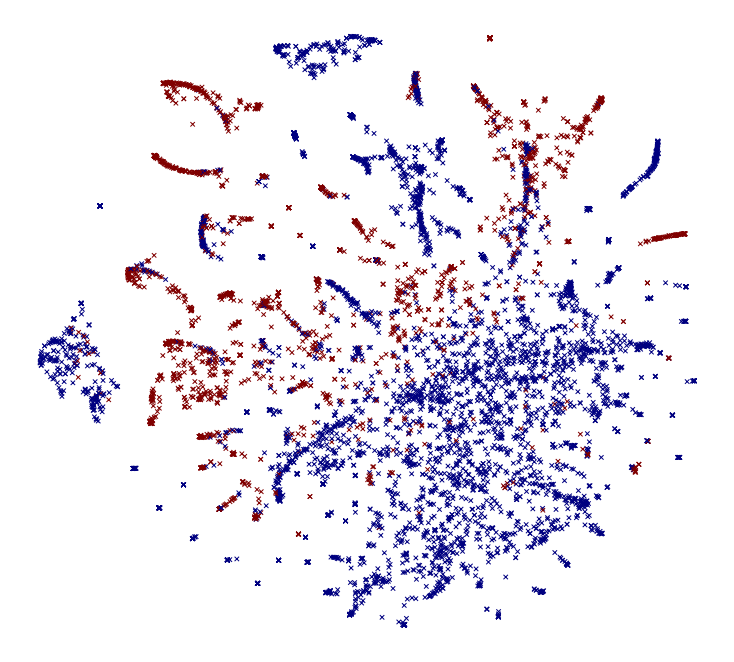

In [20]:
fig = figure(figsize=(10, 10))
ax = axes(frameon=False)
setp(ax, xticks=(), yticks=())
subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
scatter(ndf[0], ndf[1], c=labels, marker="x")